# Programming in Python


## 1. Getting to know Python

### Different ways to interact with Python
 1. Using the interpreter (for instance `ipython`)
 2. Using the `jupyter notebook`
 3. Writing and executing programs (`python myProgram.py`)

### Python language elements

 #### Python as a calculator 
   * operations 
   * math functions

In [1]:
import cmath
import math
x = 1.2
y = cmath.exp(1j* x)
z = math.exp(x)
print(y)

(0.3623577544766736+0.9320390859672263j)


#### numbers and other data types
 * integers
 * floats
 * Booleans

In [2]:
x = 1.2
type(x > 1)

bool

#### working with strings 
 * single line
 * extending obver several lines
 * converting numbers to string

In [3]:
s = '''writing over many lines'''
print(s[-10:])

many lines


#### packing things together -- lists and tuples
 * length
 * indexing 
 * slicing

In [4]:
lst = [1,[1,1], [1,2, 1], [1, 3, 6, 3, 1]]
print(lst)

[1, [1, 1], [1, 2, 1], [1, 3, 6, 3, 1]]


In [5]:
lst[2][1]

2

#### accessing values by keys -- dictionaries
 * example

In [6]:
d = {'Jonny': 1987, 'Anne': 1976}
d['Anne'] # expect to get 1976 back

1976

 #### storing data in **variables**
  * setting and retrieving 

 #### printing
  * default print
  * formatted print

 #### **Identation** is part of the language!
   * loops
   * conditionals
   * scoping

In [7]:
def foo(x, y=10):
    # do stuff
    return x*y

foo(2, 4)

8

#### functions

#### comments

### Common pitfalls
 * watch out for indentation
 * comparing floats may yield unintented consequences
 * integer division (//) vs division (/)
 * in place vs function that return new objects

## 2. Python with batteries charged

### Numpy for fast array operations (Matlab and IDL users pay attention)

$$\frac{\partial f}{\partial t} + u \frac{\partial f}{\partial x} = 0$$
$$f_i^{t + \Delta t} = (1 - C) f_i^t + C f_{i-1}^t$$ with $$C \equiv \frac{u \Delta t}{\Delta x}$$

Up-wind implementation:

`newf[i] = (1 - c)*f[i] + c*f[i - 1]` for $i \in 1...n-1$

`newf[0] = (1 - c)*f[0] + c*f[-1]` (assuming periodic boundary conditions)

In [12]:
import numpy

# code to advance function f starting from initial 
# condition f0
#
def advance(f0, c, nt=10):
    """
    Advance the function 
    f0  initial condition
    c   Courant coefficient
    nt  number of time steps
    """
    f = f0.copy()
    for i in range(nt):
        newf = (1 - c) * f
        newf[1:] += c * f[:-1]
        # updating the first cell taking the last cell previous value
        # (periodic boundary conditions)
        newf[0] + c * f[-1]
        # copy
        f[:] = newf
    return f


n = 1000
f0 = numpy.zeros([n], numpy.float64) # initial condition
f0[0:n//4] = 1.
f = advance(f0, 0.99, nt=500)



## Plotting

(0, 1.2)

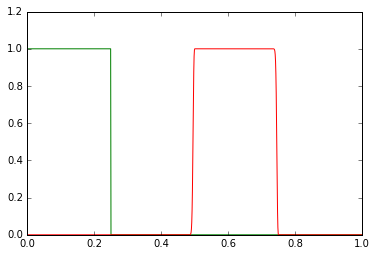

In [14]:
# magic to get plots inside jupyter documents
% matplotlib inline

from matplotlib import pylab
x = numpy.linspace(0., 1., n)
pylab.plot(x, f0, 'g-')
pylab.plot(x, f, 'r-')
pylab.ylim([0, 1.2])

### Pandas for data analysis (R users pay attention)

What the relation between prosperity and latitude?
 * Look at GDP data for a number of cities around the world
 * Get the population and the latitude data for these cities
 * Compute the GDP per capita for each city
 * plot GDP per capita data against the latitude of each city

In [20]:
import pandas 
gdp = pandas.read_csv('http://bit.ly/citiesGDP')

In [21]:
# show the first few rows
print(gdp.columns)
gdp.head(10)


Index(['Rank', 'City/Urban area', 'Country', 'GDP in US$bn 2005'], dtype='object')


,Rank,City/Urban area,Country,GDP in US$bn 2005
0,1,Tokyo,Japan,1191
1,2,New York,USA,1133
2,3,Los Angeles,USA,639
3,4,Chicago,USA,460
4,5,Paris,France,460
5,6,London,UK,452
6,7,Osaka/Kobe,Japan,341
7,8,Mexico City,Mexico,315
8,9,Philadelphia,USA,312
9,10,Washington DC,USA,299


In [22]:
# renaming columns

In [23]:
# select the cities for which the GDP > $1000bn
mask = gdp.loc[:, 'GDP in US$bn 2005'] > 500
gdp.loc[mask, ['City/Urban area', "Country"]].head()

,City/Urban area,Country
0,Tokyo,Japan
1,New York,USA
2,Los Angeles,USA


In [24]:
geo = pandas.read_csv('http://bit.ly/world_cities')
geo.head()

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,Afghanistan,AF,AFG,Badghis
1,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,Afghanistan,AF,AFG,Ghor
2,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,Afghanistan,AF,AFG,Hilmand
3,Zaranj,Zaranj,31.112001,61.886998,49851.0,Afghanistan,AF,AFG,Nimroz
4,Tarin Kowt,Tarin Kowt,32.633298,65.866699,10000.0,Afghanistan,AF,AFG,Uruzgan


In [25]:
# remove some columns
geo.drop(['city_ascii', 'lng', 'iso2', 'iso3', 'province'], axis=1, inplace=True)
geo.head(3)

,city,lat,pop,country
0,Qal eh-ye Now,34.983000,2997.0,Afghanistan
1,Chaghcharan,34.516701,15000.0,Afghanistan
2,Lashkar Gah,31.582998,201546.0,Afghanistan


In [26]:
# get the number of rows
geo.shape[0]

7322

In [27]:
# show the first row
geo.loc[0, :]

city       Qal eh-ye Now
lat               34.983
pop                 2997
country      Afghanistan
Name: 0, dtype: object

In [28]:
# display the city of the first row
geo.loc[0, 'city']

'Qal eh-ye Now'

In [29]:
# list the cities in New Zealand with more than 100000 inhabitants
mask = geo.loc[:, 'country'] == 'New Zealand'
df = geo.loc[mask, ['city', 'pop', 'lat', 'country']]

In [30]:
# sort the NZ cities by population
df.sort_values('pop', ascending=False).head()

,city,pop,lat,country
4294,Auckland,759510.0,-36.850013,New Zealand
4288,Manukau,336141.5,-36.999978,New Zealand
4292,Wellington,296300.0,-41.299974,New Zealand
4293,Christchurch,295351.5,-43.535031,New Zealand
4267,Takapuna,184815.5,-36.791257,New Zealand


In [31]:
# get all the cities named "London"
geo.loc[geo.loc[:, 'city'] == "London", ['city', 'country', 'lat']]

,city,country,lat
1322,London,Canada,42.969999
6302,London,United Kingdom,51.499995
6442,London,United States of America,37.128882


In [32]:
# get all the cities named "Portland" 
geo.loc[geo.loc[:, 'city'] == "Portland", ['city', 'country', 'lat']]

,city,country,lat
574,Portland,Australia,-38.340000
6946,Portland,United States of America,43.672162
7022,Portland,United States of America,45.520024


In [33]:
# remove some rows in the datasets
geo.drop([1322, 6442, 574, 6946], axis=0, inplace=True)
geo.shape

(7318, 4)

In [34]:
# check that London and Portland appear only once
city = geo.loc[:, 'city']
geo.loc[(city == "London") | (city == "Portland") , 
        ['city', 'country', 'lat']]

,city,country,lat
6302,London,United Kingdom,51.499995
7022,Portland,United States of America,45.520024


In [35]:
# combine the two tables
# beware that some cities appear multiple times across countries
# and that the 'Uniteds' need to be abreviated
gdp_per_capita = []
lats = []
city_names = []
countries = []
usa =geo.loc[:,'country'] == 'United States of America'
geo.loc[usa,'country'] = 'USA'
uk =geo.loc[:,'country'] == 'United Kingdom'
geo.loc[uk,'country'] = 'UK'
# iterate over the rows of gdp
for row in gdp.iterrows():
    index=row[0]
    data=row[1]
    rank, city, country, gdpVal = data
    df = geo.loc[geo.loc[:,'city'] == city, ['city','pop', 'lat', 'country']]
    df.shape
    numrows = df.shape[0]
    if numrows == 1: #seems surplus to requirements, but catches out zero length df
        pop = float(df['pop'])
        lat = float(df['lat'])
        lats.append(lat)
        gdp_per_capita.append(gdpVal/pop*1e9)
        city_names.append(city)
        countries.append(country)
    if numrows > 1:
        df = df.loc[df.loc[:,'country'] == country,['city','pop', 'lat', 'country']]
        pop = float(df['pop'])
        lat = float(df['lat'])
        lats.append(lat)
        gdp_per_capita.append(gdpVal/pop*1e9)
        city_names.append(city)
        countries.append(country)


In [36]:
# create a new data frame with data combined from two tables
gdpPerCapita = pandas.DataFrame({
        'city': city_names,
        'GDP per capita US$ 2005': gdp_per_capita,
        'lat': lats,
        'country': countries,
    })
gdpPerCapita.head()

,GDP per capita US$ 2005,city,country,lat
0,54120.866618,Tokyo,Japan,35.685017
1,83776.128003,New York,USA,40.749979
2,78914.121923,Los Angeles,USA,33.989978
3,77755.555465,Chicago,USA,41.829991
4,92787.047574,Paris,France,48.866693


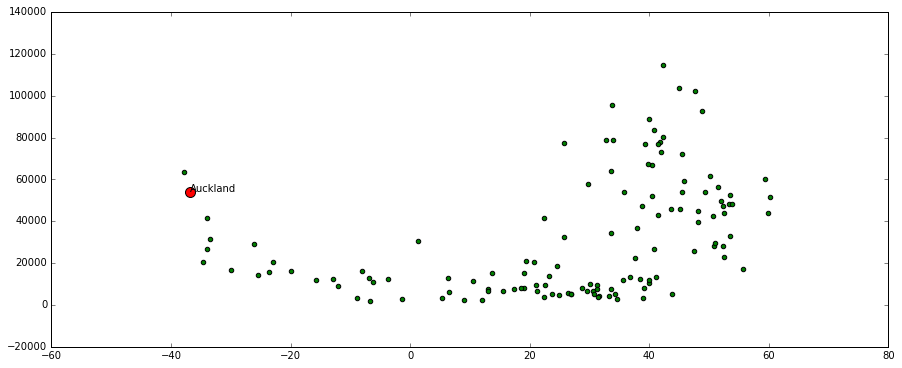

In [37]:
# create scatter plot 
% matplotlib inline
from matplotlib import pylab
# nicer plot size
pylab.rcParams['figure.figsize'] = (15, 6)

# scatter plot 
pylab.scatter(lats, gdp_per_capita, c='g')

x = gdpPerCapita.loc[gdpPerCapita['country'] == 'New Zealand', 'lat']
y = gdpPerCapita.loc[gdpPerCapita['country'] == 'New Zealand', 'GDP per capita US$ 2005']
pylab.scatter(x, y, s=100, c='r')
labels = gdpPerCapita.loc[gdpPerCapita['country'] == 'New Zealand', 'city']
for i in range(len(x)):
    pylab.annotate(labels.iloc[i], (x.iloc[i], y.iloc[i]))

